# A quick hack of choosing the suitable ML model

<b>This jupyter notebook focuses on quick ways of comparing models<br></b>

Comparing models using:
<ol>
<li><b>sklearn</b></li>
<ul>
<li>Classification</li>
</ul>
<li><b>lazypredict</b></li>
<ul>
<li>Classification</li>
<li>Regression</li>
</ul>
</ol>

## First prepare dataset for classification and regression models


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# iris dataset
from sklearn.datasets import load_iris
# boston housing price
from sklearn.datasets import load_boston

## Data preperation of iris dataset

In [2]:
# load iris
iris = load_iris()

# feature matrix in "X" 
X = iris.data

# target in "y"
y = iris.target

# create pandas df
data_iris = pd.DataFrame(X, columns=iris.feature_names)
data_iris['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data_iris.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

#### Dataset: </br>
<b>Feature names:</b> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] </br>
<b>Target mapping:</b> {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

#### Check missing values

In [3]:
# check the null values
data_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

The dataset has no null values <br>

#### Check the distribution of class



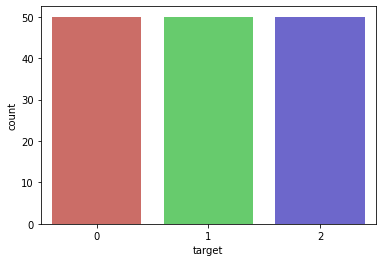

In [4]:
sns.countplot(x = 'target', data= data_iris, palette='hls');

Class is balanced

#### Quick pair plot to see correlation between different features

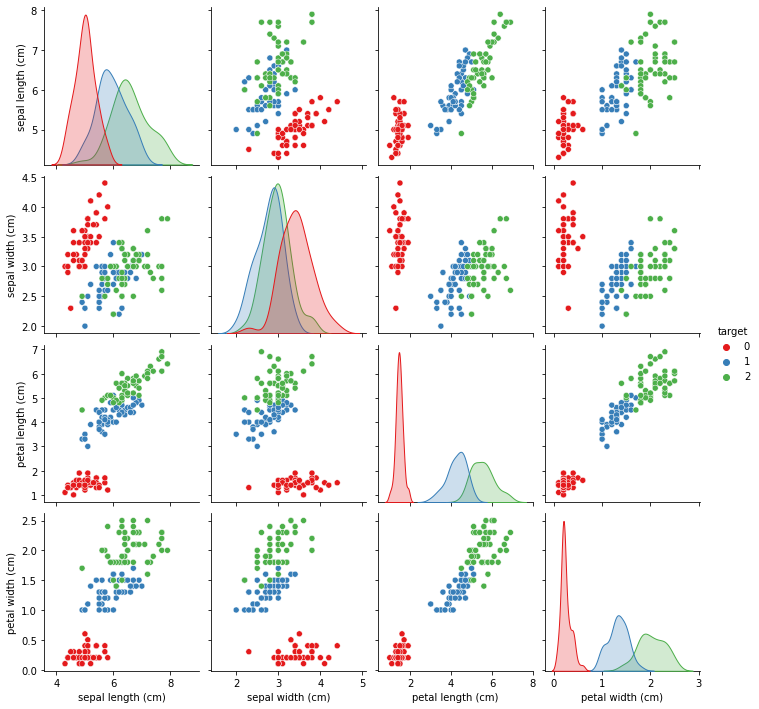

In [5]:
# pairplot for distribution
sns.pairplot(data_iris ,hue="target", palette='Set1');

#### split the dataset

In [6]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### standardize dataset

In [7]:
# scaling features
scalar = StandardScaler()

# fit and transform scalar to train set
X_train_scaled = scalar.fit_transform(X_train)

# transform test set
X_test_scaled = scalar.transform(X_test)



### Use Sklearn to find best model

In [8]:
# importing 5 models to fit data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# create a list
models = [
          ('LogisticRegression', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC()), 
          ('RF', RandomForestClassifier()),
          ('GNB', GaussianNB())
        ]

results = []
names = []
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
target_name = ['setosa', 'versicolor', 'virginica']
for name, model in models:
        clf = model.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_name))


LogisticRegression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVC
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00     

Train the model with no regularization, and verify that the loss function is close to zero. The test can check that the model has enough parameters to memorize the task and running different models can show which model can perform better for the data set.

### Use LazyPredict to find best model

In [13]:
# run test
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None,predictions=True)
models,predictions = clf.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████| 29/29 [00:00<00:00, 30.15it/s]


In [38]:
# Since it is multi class classification hence ROC AUC is None. Hence, remove the columns
iris_models = models[models.columns[models.columns != 'ROC AUC']]

In [39]:
# reset index
iris_models.reset_index(inplace=True)
iris_models

Model  Accuracy  Balanced Accuracy  F1 Score  \
0                  LGBMClassifier      1.00               1.00      1.00   
1              LogisticRegression      1.00               1.00      1.00   
2                   XGBClassifier      1.00               1.00      1.00   
3                             SVC      1.00               1.00      1.00   
4          DecisionTreeClassifier      1.00               1.00      1.00   
5                   SGDClassifier      1.00               1.00      1.00   
6          RandomForestClassifier      1.00               1.00      1.00   
7            ExtraTreesClassifier      1.00               1.00      1.00   
8   QuadraticDiscriminantAnalysis      1.00               1.00      1.00   
9            KNeighborsClassifier      1.00               1.00      1.00   
10                     Perceptron      1.00               1.00      1.00   
11                          NuSVC      1.00               1.00      1.00   
12     LinearDiscriminantAnalysis      1.00               1.00      1.00   
13              BaggingClassifier      1.00               1.00      1.00   
14             AdaBoostClassifier      0.97               0.94      0.97   
15                 LabelSpreading      0.97               0.94      0.97   
16               LabelPropagation      0.97               0.94      0.97   
17                     GaussianNB      0.97               0.94      0.97   
18            ExtraTreeClassifier      0.97               0.94      0.97   
19                      LinearSVC      0.97               0.94      0.97   
20                RidgeClassifier      0.80               0.82      0.81   
21              RidgeClassifierCV      0.80               0.82      0.81   
22         CalibratedClassifierCV      0.80               0.82      0.81   
23    PassiveAggressiveClassifier      0.87               0.80      0.86   
24                NearestCentroid      0.80               0.76      0.80   
25                    BernoulliNB      0.63               0.66      0.62   
26                DummyClassifier      0.30               0.34      0.29   

    Time Taken  
0         0.08  
1         0.02  
2         0.06  
3         0.01  
4         0.01  
5         0.01  
6         0.18  
7         0.13  
8         0.01  
9         0.02  
10        0.01  
11        0.02  
12        0.01  
13        0.04  
14        0.12  
15        0.01  
16        0.01  
17        0.01  
18        0.01  
19        0.01  
20        0.02  
21        0.01  
22        0.06  
23        0.01  
24        0.01  
25        0.02  
26        0.01

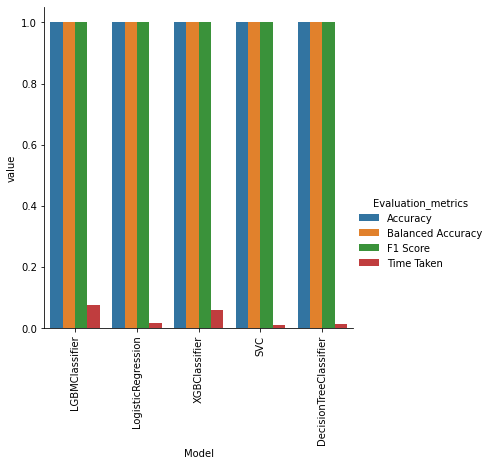

In [73]:
# melt columns
iris_melted = pd.melt(iris_models[:5], id_vars="Model", var_name="Evaluation_metrics", value_name="value")
# plot
g = sns.factorplot(x='Model', y='value', hue='Evaluation_metrics', data=iris_melted, kind='bar');
g.set_xticklabels(rotation=90);

## Data preperation of boston housing dataset

In [63]:
# load iris
boston = load_boston()

# feature matrix in "X" 
X = boston.data

# target in "y"
y = boston.target

# create pandas df
data_boston = pd.DataFrame(X, columns=boston.feature_names)
data_boston['target'] = pd.DataFrame(y.reshape(-1,1), columns=["target"])
data_boston.head(5)

CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  target  
0   4.98   24.00  
1   9.14   21.60  
2   4.03   34.70  
3   2.94   33.40  
4   5.33   36.20

#### Dataset: </br>
<b>Feature names:</b> ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'] </br>
<b>Target :</b> {'target'}

#### Check missing values

In [64]:
# check the null values
data_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

#### Check correlation

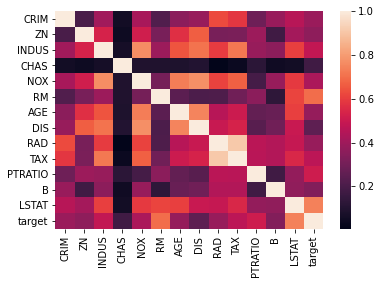

In [65]:
sns.heatmap(data_boston.corr().abs());

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with target.

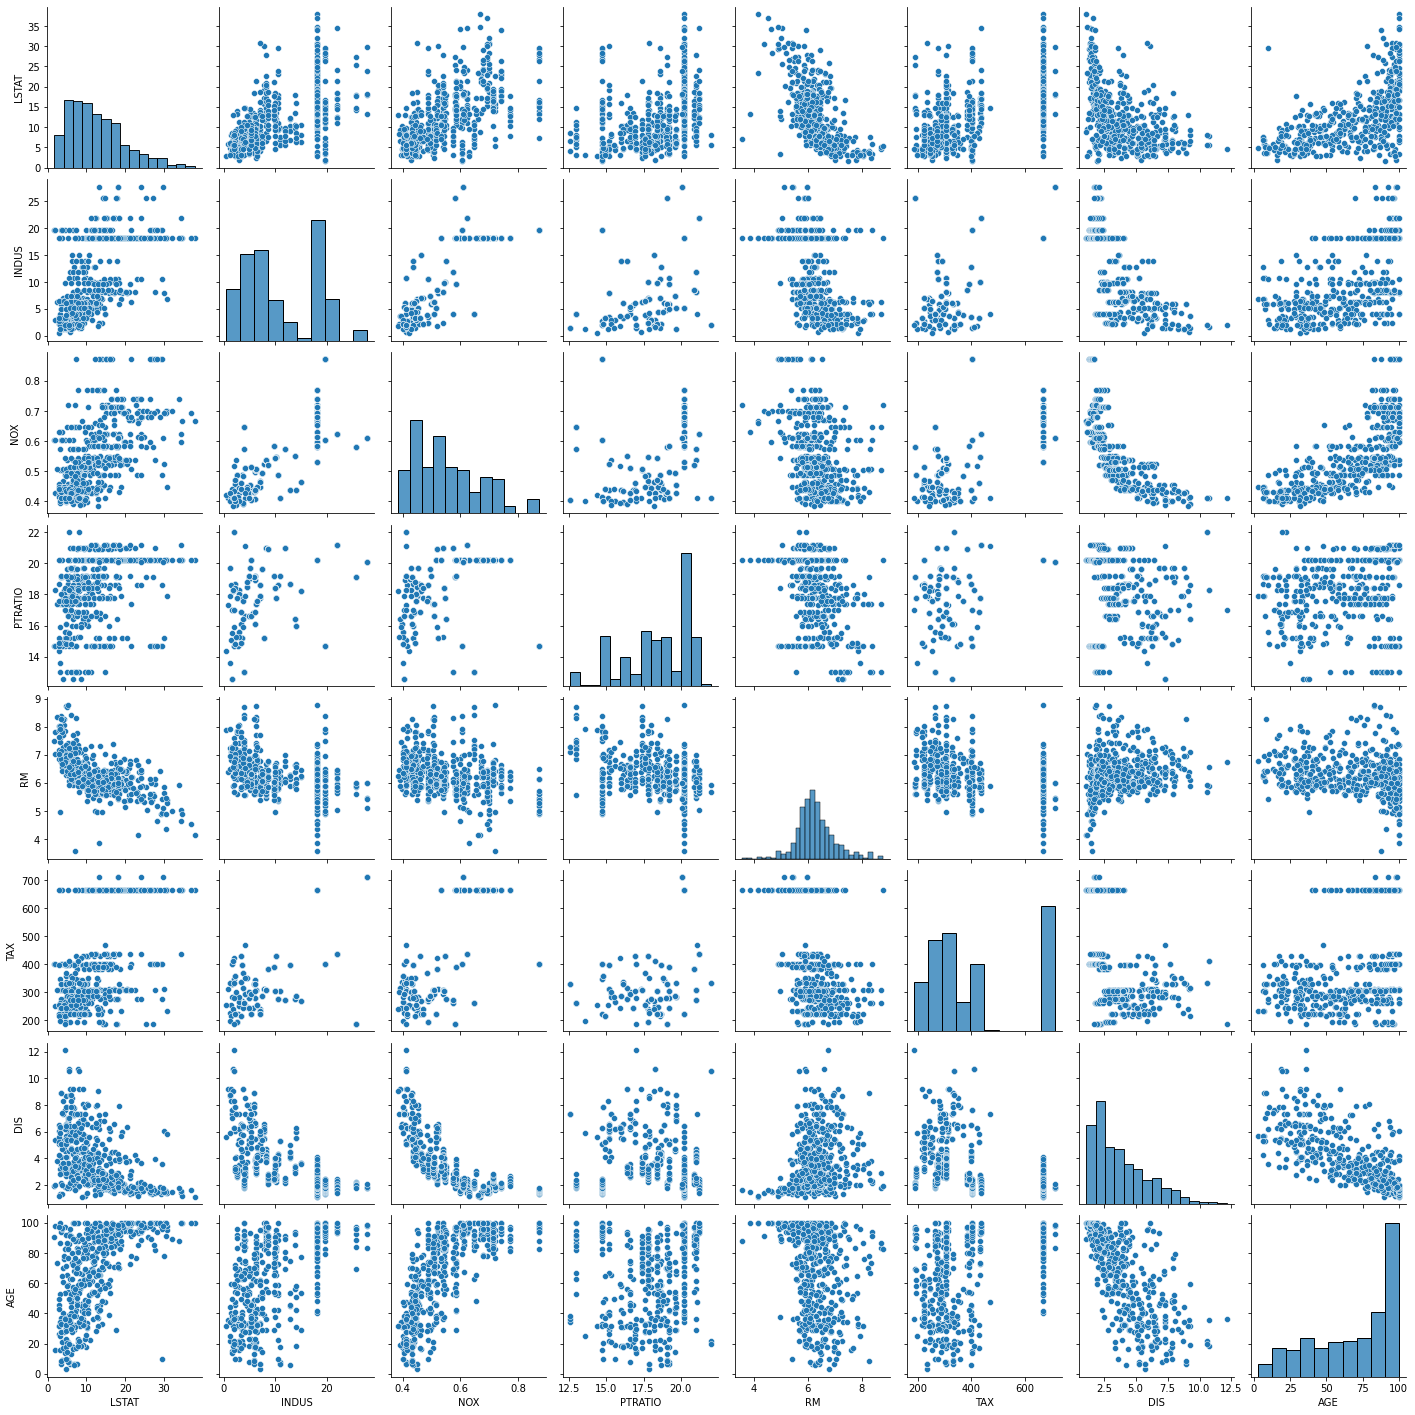

In [49]:
# pairplot for distribution
sns.pairplot(data_boston[['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']] , palette='Set1');

As it can be seen that some features are skewed. However, the purpose of this is to show how quickly can we compare the model. For this model comparision following features are chosen:

features : ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']

In [66]:
# new dataset
data_boston_new = data_boston[['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE', 'target']]
data_boston_new.head(n=7)

LSTAT  INDUS  NOX  PTRATIO   RM    TAX  DIS   AGE  target
0   4.98   2.31 0.54    15.30 6.58 296.00 4.09 65.20   24.00
1   9.14   7.07 0.47    17.80 6.42 242.00 4.97 78.90   21.60
2   4.03   7.07 0.47    17.80 7.18 242.00 4.97 61.10   34.70
3   2.94   2.18 0.46    18.70 7.00 222.00 6.06 45.80   33.40
4   5.33   2.18 0.46    18.70 7.15 222.00 6.06 54.20   36.20
5   5.21   2.18 0.46    18.70 6.43 222.00 6.06 58.70   28.70
6  12.43   7.87 0.52    15.20 6.01 311.00 5.56 66.60   22.90

#### split the dataset

In [67]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(data_boston_new.iloc[:,:-1], data_boston_new['target'], test_size=0.2, random_state=0)

#### standardize dataset

In [68]:
# scaling features
scalar = StandardScaler()

# fit and transform scalar to train set
X_train_scaled = scalar.fit_transform(X_train)

# transform test set
X_test_scaled = scalar.transform(X_test)

In [69]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train_scaled, X_test_scaled, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 16.59it/s]


In [70]:
boston_models = models
# reset index
boston_models.reset_index(inplace=True)
boston_models

Model  Adjusted R-Squared  R-Squared  RMSE  \
0       GradientBoostingRegressor                0.76       0.78  4.20   
1           RandomForestRegressor                0.70       0.72  4.75   
2                BaggingRegressor                0.69       0.72  4.80   
3                    XGBRegressor                0.69       0.71  4.86   
4             ExtraTreesRegressor                0.66       0.69  5.04   
5                   LGBMRegressor                0.66       0.69  5.05   
6   HistGradientBoostingRegressor                0.66       0.68  5.07   
7               AdaBoostRegressor                0.63       0.66  5.24   
8                PoissonRegressor                0.56       0.60  5.74   
9             KNeighborsRegressor                0.54       0.58  5.87   
10          DecisionTreeRegressor                0.51       0.55  6.03   
11                            SVR                0.51       0.55  6.05   
12                          NuSVR                0.50       0.54  6.13   
13    OrthogonalMatchingPursuitCV                0.50       0.54  6.15   
14                           Lars                0.49       0.53  6.18   
15     TransformedTargetRegressor                0.49       0.53  6.18   
16               LinearRegression                0.49       0.53  6.18   
17                    LassoLarsCV                0.49       0.53  6.19   
18                         LarsCV                0.49       0.53  6.19   
19                          Ridge                0.49       0.53  6.19   
20                        LassoCV                0.49       0.53  6.19   
21                  BayesianRidge                0.49       0.53  6.19   
22                   ElasticNetCV                0.49       0.53  6.20   
23                   SGDRegressor                0.49       0.53  6.20   
24                        RidgeCV                0.49       0.53  6.21   
25                    LassoLarsIC                0.48       0.52  6.23   
26             ExtraTreeRegressor                0.48       0.52  6.25   
27                          Lasso                0.46       0.50  6.36   
28                 HuberRegressor                0.46       0.50  6.38   
29                      LinearSVR                0.42       0.47  6.58   
30                     ElasticNet                0.41       0.46  6.63   
31                RANSACRegressor                0.41       0.46  6.65   
32                 GammaRegressor                0.39       0.44  6.74   
33     GeneralizedLinearRegressor                0.39       0.43  6.79   
34               TweedieRegressor                0.39       0.43  6.79   
35      OrthogonalMatchingPursuit                0.38       0.43  6.81   
36                   MLPRegressor                0.35       0.40  6.97   
37     PassiveAggressiveRegressor                0.05       0.13  8.44   
38                 DummyRegressor               -0.09      -0.00  9.03   
39                      LassoLars               -0.09      -0.00  9.03   
40       GaussianProcessRegressor               -1.04      -0.88 12.37   
41                    KernelRidge               -6.26      -5.68 23.32   

    Time Taken  
0         0.12  
1         0.25  
2         0.05  
3         0.06  
4         0.25  
5         0.06  
6         0.43  
7         0.15  
8         0.01  
9         0.02  
10        0.01  
11        0.03  
12        0.02  
13        0.02  
14        0.02  
15        0.01  
16        0.01  
17        0.02  
18        0.03  
19        0.01  
20        0.05  
21        0.01  
22        0.09  
23        0.01  
24        0.01  
25        0.01  
26        0.02  
27        0.01  
28        0.02  
29        0.01  
30        0.01  
31        0.04  
32        0.01  
33        0.01  
34        0.01  
35        0.01  
36        0.55  
37        0.01  
38        0.01  
39        0.01  
40        0.03  
41        0.02

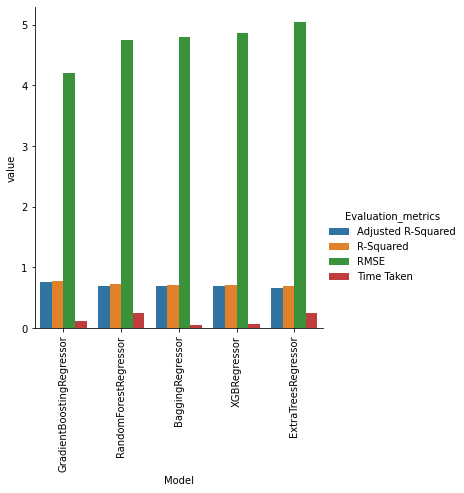

In [72]:
# melt columns
boston_melted = pd.melt(boston_models[:5], id_vars="Model", var_name="Evaluation_metrics", value_name="value")
# plot
g = sns.factorplot(x='Model', y='value', hue='Evaluation_metrics', data=boston_melted, kind='bar');
g.set_xticklabels(rotation=90);